In [1]:
from annoy import AnnoyIndex
import pandas as pd
import numpy as np
import cv2
import sys  
import matplotlib.pyplot as plt
from bot.utils.color_extractor import ColorFeaturesExtractor
from bot.utils.BOVW_extractor import BOVWFeaturesExtractor
from bot.utils.retriever import Retriever
from bot.utils.utils import get_names_from_indexes
import tensorflow as tf

# Create indexes

In [2]:
def create_index(features_path, index_dir_path, retrieval_mode, metric):
    # read features
    df_features = pd.read_csv(features_path, sep=',', header=None)
    # instantiate retriever
    retriever = Retriever(index_dir_path)
    # create index
    retriever.create_index(df_features, retrieval_mode=retrieval_mode, metric = metric)
    
    

In [27]:
create_index('../data/nn_features.csv', '../indexes/', 'neural_network', 'euclidean')

In [28]:
create_index('../data/color_features.csv', '../indexes/', 'color', 'euclidean')

In [16]:
create_index('../data/BOVW_features.csv', '../indexes/', 'bovw', 'euclidean')

In [29]:
# df_features = pd.read_csv('./data/filteredPredAll.csv', sep=',')

In [3]:
def loadimg(img_path):

    im = tf.keras.preprocessing.image.load_img(
        img_path,
        target_size=(300, 300, 3)
    )
    imarr = tf.keras.preprocessing.image.img_to_array(im)
    imarr = tf.keras.applications.efficientnet.preprocess_input(imarr)

    return np.array([imarr])

In [31]:
# df_features.to_csv('./data/filteredPredAll.csv', index=False, header=False, sep=',')

In [32]:
# df_features

In [4]:
# read model
model = tf.keras.models.load_model('../data/mymodel.h5')


In [71]:
# extract feature from input img
img_path = '../test_imgs/bag.jpg'
img_rgb = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)

In [72]:
# NN
img_features_nn = model.predict(loadimg(img_path))[1][0]

In [73]:
# BOVW extractor
features_extractor = BOVWFeaturesExtractor('../data/')
img_features_bovw = features_extractor.extract(cv2.imread(img_path))

In [74]:
# color extractor
features_extractor = ColorFeaturesExtractor((24, 26, 3), 0.6)
img_features_color = features_extractor.extract(cv2.imread(img_path), center_only=True)

In [75]:
# df_features = pd.read_csv('../data/BOVW_features.csv', sep=',', header=None)
df_names = pd.read_csv('../data/retrieval_base.csv')

In [88]:
# df_features
df_names['name'] = df_names['name'].apply(lambda x: x.split('.')[0])

In [92]:
df_names['name'] = df_names['name'].astype('int32')

In [95]:
sorted(df_names['name'])[-1]

28225

In [77]:
# instantiate retriever
retriever = Retriever('../indexes/')

In [78]:
# # create index
# retriever.create_index(df_features, retrieval_mode='sift', metric = 'euclidean')

In [79]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_nn, retrieval_mode='neural_network', n_neighbours=5, include_distances=True)

In [80]:
distances

[11.967061996459961,
 11.97700309753418,
 12.211310386657715,
 12.213958740234375,
 12.248719215393066]

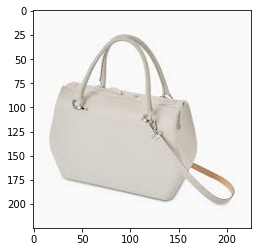

In [81]:
plt.imshow(img_rgb)

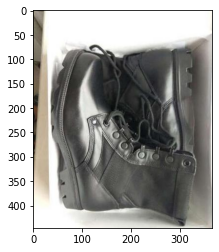

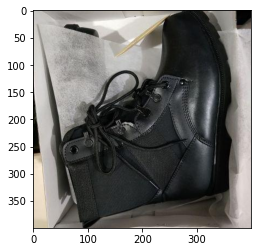

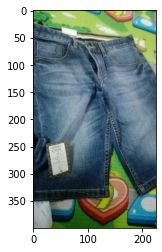

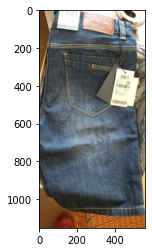

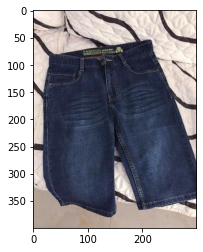

In [82]:
# get images names
names =df_names.loc[indexes, 'name'].values
# show images
for i in range(0,len(names)):
    tmp = cv2.imread('../data/train/' + names[i])
    tmp = cv2.cvtColor(tmp, cv2.COLOR_BGR2RGB)
    plt.imshow(tmp)
    plt.show()

In [51]:
# test delete index
retriever.delete_index('color')